In [ ]:
#all the imports
import json
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from math import sqrt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

In [ ]:
#read path and filenames from json
import json
with open('private.json', 'r') as fp:
    data = json.load(fp)
    
#
path = data["path"]
chosen_csv = data["chosen-csv"]

In [ ]:
#read the clean data
flies = pd.read_csv(path + chosen_csv, index_col = 0)

In [ ]:
#flies.shape
flies.columns

Index(['anglesub', 'nflies_close', 'conditioning', 'velmag', 'Chain', 'Chase',
       'dcenter', 'Grooming'],
      dtype='object')

In [ ]:
flies_dummies = pd.get_dummies(flies, prefix = '', prefix_sep = '')

In [ ]:
def descision_tree(flies : pd.DataFrame, score : str, trainsize : float= 0.7, minsamplesleaf = 1):

    #start pipeline
    X = flies.drop([score], axis = 1)
    y = flies[score]

    #Splitting to Test/Train
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = trainsize, random_state = 0)

    dtr = DecisionTreeRegressor(min_samples_leaf = minsamplesleaf).fit(X_train, y_train) #max_depth = dominant_count

    y_train_pred = dtr.predict(X_train)
    y_test_pred  = dtr.predict(X_test)

    rmse_train = sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test  = sqrt(mean_squared_error(y_test, y_test_pred))

    r2_train = r2_score(y_train, y_train_pred)
    r2_test  = r2_score(y_test, y_test_pred)

    return (rmse_train, rmse_test, r2_train, r2_test)

In [ ]:
#check loss function Vs buckets of a feature

flies = pd.read_csv(path + chosen_csv, index_col = 0)
flies_dummies = pd.get_dummies(flies, prefix = '', prefix_sep = '')
 
bins = range(1, 50, 1)

rmse_train_list = []
rmse_test_list = []
r2_train_list = []
r2_test_list = []

feature = "velmag"

for bin in bins:
    
    df = flies_dummies.copy(deep=True)
        
    mx = df[feature].max()
    mn = df[feature].min()
    d = (mx - mn) / bin
    df[feature] = mn + d * (np.round((df[feature] - mn) / d))

    (rmse_train, rmse_test, r2_train, r2_test) = descision_tree(df, "Grooming")
    
    rmse_train_list.append(rmse_train)
    rmse_test_list.append(rmse_test)
    r2_train_list.append(r2_train)
    r2_test_list.append(r2_test)    

<AxesSubplot:xlabel='bins', ylabel='rmse_test'>

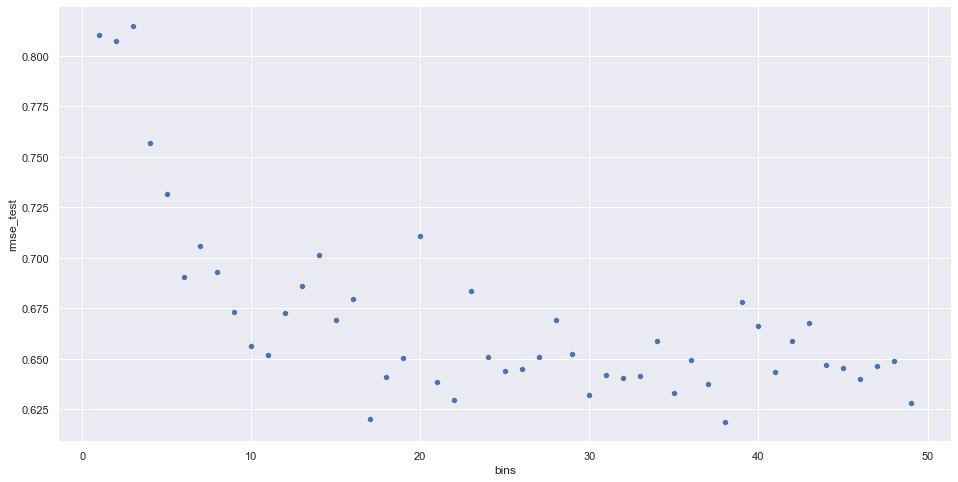

In [ ]:
plot_df = pd.DataFrame({"bins" : bins, "rmse_test" : rmse_test_list, "r2_test" : r2_test_list})
sns.set(rc = {"figure.figsize" : (16, 8)})
sns.scatterplot(data = plot_df, x = "bins", y = "rmse_test")

In [ ]:
def descision_loss_vs_min_samples_leaf(score : str):
    #check loss function Vs min_samples_leaf

    flies = pd.read_csv(path + chosen_csv, index_col = 0)
    flies_dummies = pd.get_dummies(flies, prefix = '', prefix_sep = '')

    msls = range(1, 500, 1)

    rmse_train_list = []
    rmse_test_list = []
    r2_train_list = []
    r2_test_list = []


    for msl in msls:

        (rmse_train, rmse_test, r2_train, r2_test) = descision_tree(flies_dummies, score, minsamplesleaf = msl)

        rmse_train_list.append(rmse_train)
        rmse_test_list.append(rmse_test)
        r2_train_list.append(r2_train)
        r2_test_list.append(r2_test)   
                                                                    
    plot_df = pd.DataFrame({"msls" : msls, "rmse_test" : rmse_test_list, "r2_test" : r2_test_list})
    sns.set(rc = {"figure.figsize" : (16, 8)})
    sns.scatterplot(data = plot_df, x = "msls", y = "rmse_test")

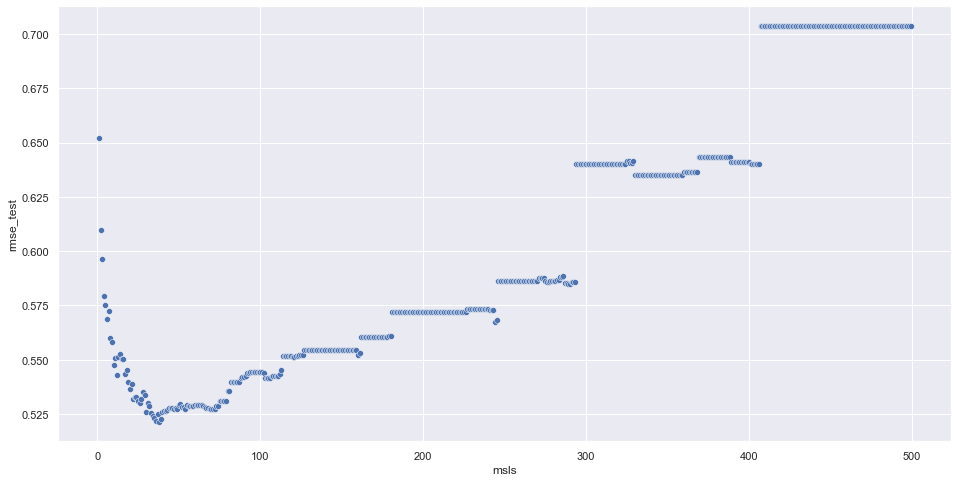

In [ ]:
descision_loss_vs_min_samples_leaf("Grooming")

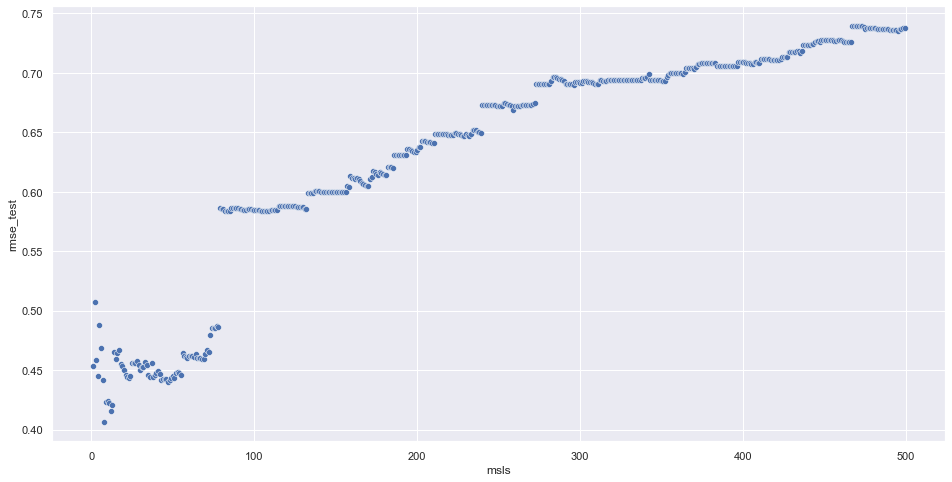

In [ ]:
descision_loss_vs_min_samples_leaf("Chase")

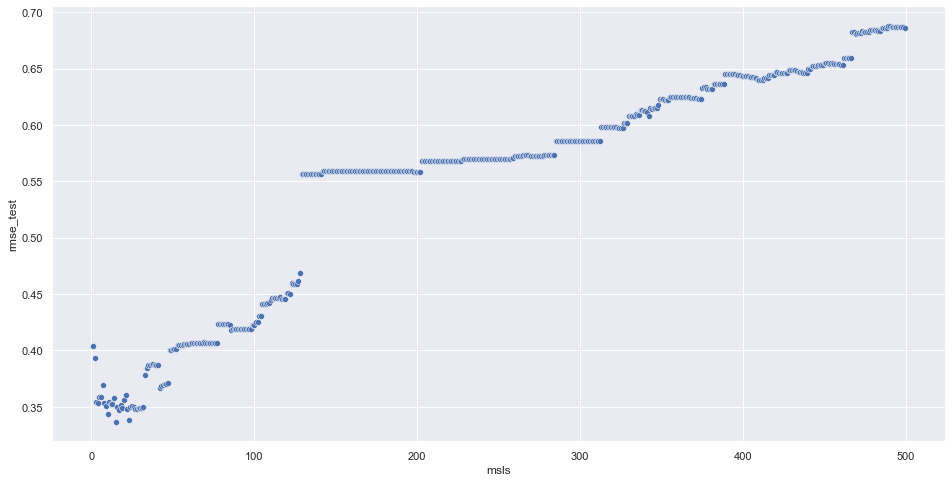

In [ ]:
descision_loss_vs_min_samples_leaf("Chain")